Reddit Scrape and Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import praw

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\ebdai\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ebdai\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ebdai\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ebdai\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ebdai\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Collect Data: I am using data scraped from the r/phish subreddit, from reddit.com
reddit = praw.Reddit(client_id='WdfbS3zq_RlVZMLYItS2DQ', client_secret='hipY0ks7e-P6pdWlQhrfytUqKyAFYg', user_agent='MSDS680 Kmean - HCA')

In [3]:
from praw.models import MoreComments
reddit = praw.Reddit(user_agent="Comment Extraction (by /u/erinkane)",
                     client_id="WdfbS3zq_RlVZMLYItS2DQ", client_secret="hipY0ks7e-P6pdWlQhrfytUqKyAFYg")
subreddit = reddit.subreddit('phish')

# Collect posts
posts = []
for post in subreddit.hot(limit=1000):  # Adjust the limit if needed
    posts.append([post.title, post.selftext])

df_reddit = pd.DataFrame(posts, columns=['title', 'body'])

In [4]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   986 non-null    object
 1   body    986 non-null    object
dtypes: object(2)
memory usage: 15.5+ KB


In [7]:
df_reddit

,title,body
0,Mondegreen set times announced,I thought they usually do a daytime set as wel...
1,New Mondegreen rumors,"Yo, the word in the street is that there isn’t..."
2,What do you like about Phish that isn’t discus...,Phish knows how to end a song. Some artists ju...
3,Water Filling Stations at Wolf Trap,Happy to find out they now have water filling ...
4,Got Bored in Church,
...,...,...
981,Montreal,Anybody have a groovy place to hang before TAB?
982,The Lizards have arrived…,https://youtu.be/USg8flpwCT0\n
983,Yep another phish song in a sports game post,Listening to the Cubs game today on the radio ...
984,Dezron Douglas,Dezron sounds great in this stripped-down line...


In [9]:
df_reddit = df_reddit.dropna(subset=['body'])
df_reddit

,title,body
0,Mondegreen set times announced,I thought they usually do a daytime set as wel...
1,New Mondegreen rumors,"Yo, the word in the street is that there isn’t..."
2,What do you like about Phish that isn’t discus...,Phish knows how to end a song. Some artists ju...
3,Water Filling Stations at Wolf Trap,Happy to find out they now have water filling ...
4,Got Bored in Church,
...,...,...
981,Montreal,Anybody have a groovy place to hang before TAB?
982,The Lizards have arrived…,https://youtu.be/USg8flpwCT0\n
983,Yep another phish song in a sports game post,Listening to the Cubs game today on the radio ...
984,Dezron Douglas,Dezron sounds great in this stripped-down line...


In [10]:
# Removing Stopwords
import nltk
from nltk.corpus import stopwords
import string

In [11]:
# Download stopwords from NLTK
nltk.download('stopwords')

def remove_stopwords_punctuation(text):
    # Ensure text is a string
    text = str(text)
    
    # Tokenize the text into words
    words = text.split()
 
    # Get a set of English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Remove punctuation from the list of words
    cleaned_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

df_reddit['cleaned_text'] = df_reddit['title'].apply(remove_stopwords_punctuation)
df_reddit

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ebdai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,body,cleaned_text
0,Mondegreen set times announced,I thought they usually do a daytime set as wel...,Mondegreen set times announced
1,New Mondegreen rumors,"Yo, the word in the street is that there isn’t...",New Mondegreen rumors
2,What do you like about Phish that isn’t discus...,Phish knows how to end a song. Some artists ju...,like Phish discussed
3,Water Filling Stations at Wolf Trap,Happy to find out they now have water filling ...,Water Filling Stations Wolf Trap
4,Got Bored in Church,,Got Bored Church
...,...,...,...
981,Montreal,Anybody have a groovy place to hang before TAB?,Montreal
982,The Lizards have arrived…,https://youtu.be/USg8flpwCT0\n,Lizards
983,Yep another phish song in a sports game post,Listening to the Cubs game today on the radio ...,Yep another phish song sports game post
984,Dezron Douglas,Dezron sounds great in this stripped-down line...,Dezron Douglas


In [12]:
# Save the DataFrame as a CSV file  
df_reddit.to_csv('df_reddit_saved.csv', index=False)

In [13]:
import pandas as pd  
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
# Load the df_reddit dataset into a DataFrame  
df = pd.read_csv(r"C:\Users\ebdai\OneDrive\Regis\MSDS692_X40 Data Science Practivum I\Phish.net.data\df_reddit_saved.csv")

In [15]:
# Initialize the Sentiment Intensity Analyzer  
sia = SentimentIntensityAnalyzer()

In [16]:
# Perform sentiment analysis on fan-generated content  
sentiment_scores = []
for content in df['cleaned_text']:
    if isinstance(content, float):
        content = str(content)  # Convert float values to string  
    sentiment_score = sia.polarity_scores(content)
    sentiment_scores.append(sentiment_score['compound'])

# Assign sentiment scores to the DataFrame  
df['sentiment_score'] = sentiment_scores

# Save the DataFrame as a CSV file  
df.to_csv('df_reddit_sentiment.csv', index=False)
df

,title,body,cleaned_text,sentiment_score
0,Mondegreen set times announced,I thought they usually do a daytime set as wel...,Mondegreen set times announced,0.0000
1,New Mondegreen rumors,"Yo, the word in the street is that there isn’t...",New Mondegreen rumors,0.0000
2,What do you like about Phish that isn’t discus...,Phish knows how to end a song. Some artists ju...,like Phish discussed,0.3612
3,Water Filling Stations at Wolf Trap,Happy to find out they now have water filling ...,Water Filling Stations Wolf Trap,-0.3182
4,Got Bored in Church,NaN,Got Bored Church,-0.2732
...,...,...,...,...
981,Montreal,Anybody have a groovy place to hang before TAB?,Montreal,0.0000
982,The Lizards have arrived…,https://youtu.be/USg8flpwCT0\n,Lizards,0.0000
983,Yep another phish song in a sports game post,Listening to the Cubs game today on the radio ...,Yep another phish song sports game post,0.2960
984,Dezron Douglas,Dezron sounds great in this stripped-down line...,Dezron Douglas,0.0000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            986 non-null    object 
 1   body             704 non-null    object 
 2   cleaned_text     966 non-null    object 
 3   sentiment_score  986 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.9+ KB


In [18]:
# remove rows with missing values from th 'body' and 'cleaned_text' columns
cleaned_df = df.dropna(subset=['body', 'cleaned_text'])

In [19]:
cleaned_df.isnull()

,title,body,cleaned_text,sentiment_score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
7,False,False,False,False
...,...,...,...,...
981,False,False,False,False
982,False,False,False,False
983,False,False,False,False
984,False,False,False,False


In [20]:
import pandas as pd  
import re  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize

# Remove unnecessary characters and symbols  
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [21]:
# Convert text to lowercase  
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].str.lower()

In [22]:
# Tokenization  
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [23]:
# Remove stop words  
stop_words = set(stopwords.words('english'))
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [24]:
from nltk.stem import WordNetLemmatizer  
from nltk.corpus import wordnet

In [25]:
# Lemmatization  
lemmatizer = WordNetLemmatizer()
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].apply(lambda x: [lemmatizer.lemmatize(word, wordnet.VERB) for word in x])

In [26]:
# Remove numbers or digits  
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].apply(lambda x: [word for word in x if not word.isdigit()])

In [27]:
# Handle encoding issues  
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].apply(lambda x: [word.encode('ascii', 'ignore').decode('utf-8') for word in x])

To determine if statements are positive or negative, I will use sentiment analysis techniques. One common approach is to use pre-trained sentiment analysis models or lexicons. Here's an example of how you can perform sentiment analysis using the popular NLTK library in Python:

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer  
sia = SentimentIntensityAnalyzer()

In [29]:
# Apply sentiment analysis to your text data  
cleaned_df['sentiment_score'] = cleaned_df['cleaned_text'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])

In [30]:
# Classify statements as positive, negative, or neutral based on the sentiment score  
cleaned_df['sentiment'] = cleaned_df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

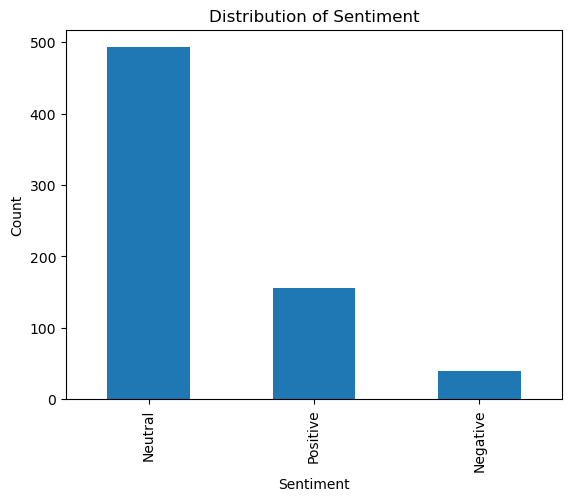

In [31]:
# Explore the distribution of sentiment:
import matplotlib.pyplot as plt

sentiment_counts = cleaned_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

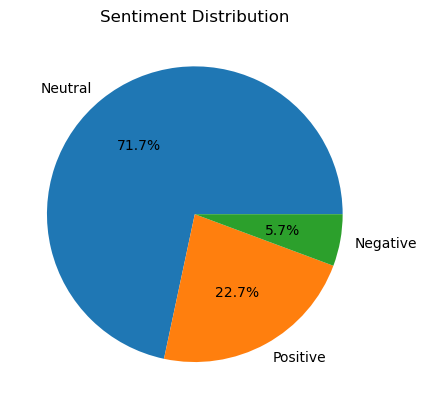

In [32]:
# Visualize sentiment analysis results:
pie_data = cleaned_df['sentiment'].value_counts()
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

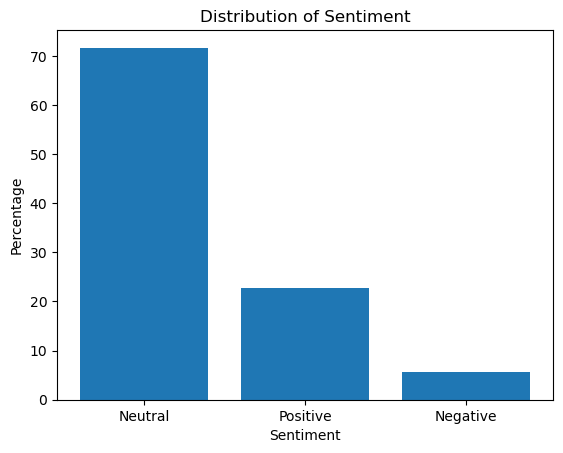

In [33]:
sentiment_counts = cleaned_df['sentiment'].value_counts()
total_count = len(cleaned_df)

# Calculate percentage scores  
percent_scores = (sentiment_counts / total_count) * 100

# Plot the sentiment distribution with percentage scores  
plt.bar(percent_scores.index, percent_scores.values)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Distribution of Sentiment')
plt.show()

In [34]:
print(cleaned_df.columns)

Index(['title', 'body', 'cleaned_text', 'sentiment_score', 'sentiment'], dtype='object')


In [35]:
# Sentiment analysis aggregation:
sentiment_by_category = cleaned_df.groupby('body')['sentiment_score'].mean()

In [36]:
# Sentiment-based decision making:
negative_statements = cleaned_df[cleaned_df['sentiment'] == 'Negative']

In [37]:
# Sentiment analysis for predictive modeling:
# Incorporate sentiment scores as features in your predictive model  
X = cleaned_df[['title', 'body', 'sentiment']]
y = cleaned_df['sentiment_score']

In [38]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error

In [39]:
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(y_train.dtype)
print(y_train.shape)

float64
(550,)


In [41]:
X = X.astype(str)
y = y.astype(str)

print(X)
print(y)

                                                 title  \
0                       Mondegreen set times announced   
1                                New Mondegreen rumors   
2    What do you like about Phish that isn’t discus...   
3                  Water Filling Stations at Wolf Trap   
7    My goodness...that Philly '97 Makisupa Policem...   
..                                                 ...   
981                                           Montreal   
982                          The Lizards have arrived…   
983       Yep another phish song in a sports game post   
984                                     Dezron Douglas   
985                               Sphere 4/21 N4 Code?   

                                                  body sentiment  
0    I thought they usually do a daytime set as wel...   Neutral  
1    Yo, the word in the street is that there isn’t...   Neutral  
2    Phish knows how to end a song. Some artists ju...  Positive  
3    Happy to find out they now hav

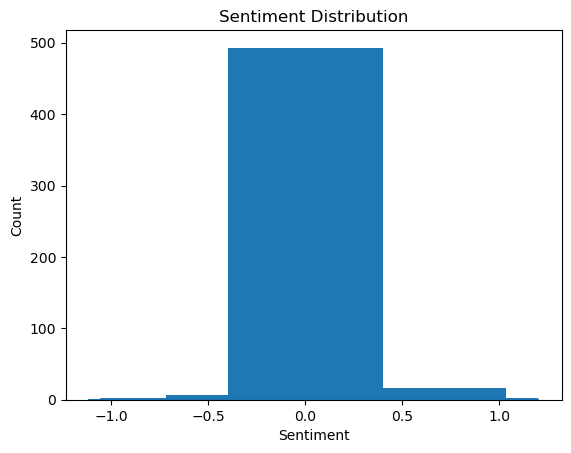

In [42]:
# Count the number of occurrences for each sentiment  
sentiment_counts = cleaned_df['sentiment_score'].value_counts()

# Plot the sentiment distribution  
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [43]:
# Count the number of occurrences for each sentiment  
sentiment_counts = cleaned_df['sentiment_score'].value_counts()

# Create a DataFrame with sentiment and count columns  
sentiment_table = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})

# Display the sentiment table  
print(sentiment_table)

    Sentiment  Count
0      0.0000    493
1      0.6369     17
2      0.4588     13
3      0.5106     13
4      0.3182     10
..        ...    ...
64     0.2732      1
65     0.7783      1
66    -0.6808      1
67     0.7351      1
68     0.5267      1

[69 rows x 2 columns]


In [44]:
sentiment_scores = cleaned_df['sentiment_score'].astype(float)
sentiment_scores

0      0.0000
1      0.0000
2      0.3612
3     -0.3182
7      0.0000
        ...  
981    0.0000
982    0.0000
983    0.2960
984    0.0000
985    0.0000
Name: sentiment_score, Length: 688, dtype: float64

In [45]:
from textblob import TextBlob

# Function to get sentiment score for a given text  
def get_sentiment_score(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  
    return sentiment_score

# Example usage  
text = "I love this song! It's amazing."
sentiment_score = get_sentiment_score(text)
print("Sentiment Score:", sentiment_score)

Sentiment Score: 0.6125


In [46]:
top_ten_sentiment_data = df.nlargest(10, 'sentiment_score')[['body', 'sentiment_score']]
print(top_ten_sentiment_data)

                                                  body  sentiment_score
712                                                NaN           0.9246
234                                                NaN           0.8910
16                                                 NaN           0.8271
664                                                NaN           0.8225
831                                                NaN           0.8173
889  I can kinda play it but I max out out at about...           0.8074
972                                                NaN           0.8074
342  Attended the '17 run. All around great shows. ...           0.8020
489  Lil portrait of the chairman- oil pastels on c...           0.8020
835                                                NaN           0.7925


In [47]:
cleaned_df = df.dropna(subset=['body'])

# Display the cleaned DataFrame  
print(cleaned_df)

                                                 title  \
0                       Mondegreen set times announced   
1                                New Mondegreen rumors   
2    What do you like about Phish that isn’t discus...   
3                  Water Filling Stations at Wolf Trap   
7    My goodness...that Philly '97 Makisupa Policem...   
..                                                 ...   
981                                           Montreal   
982                          The Lizards have arrived…   
983       Yep another phish song in a sports game post   
984                                     Dezron Douglas   
985                               Sphere 4/21 N4 Code?   

                                                  body  \
0    I thought they usually do a daytime set as wel...   
1    Yo, the word in the street is that there isn’t...   
2    Phish knows how to end a song. Some artists ju...   
3    Happy to find out they now have water filling ...   
7     Then dr

In [48]:
top_ten_phrases = df.dropna(subset=['body']).nlargest(10, 'sentiment_score')[['body', 'sentiment_score']]
print(top_ten_phrases)

                                                  body  sentiment_score
889  I can kinda play it but I max out out at about...           0.8074
342  Attended the '17 run. All around great shows. ...           0.8020
489  Lil portrait of the chairman- oil pastels on c...           0.8020
283  Phriends! \n\nGoing to great woods for the Sun...           0.7783
121                                     Line 6 Spider            0.7717
399  So I’m an unfortunate turn of events - I can n...           0.7579
298  Interested to get an older phan’s perspective ...           0.7351
193  [https://www.youtube.com/watch?v=TbzewjAbQVU](...           0.7184
644  I use the app Relisten to listen to early phis...           0.7184
890  https://preview.redd.it/u77e9naecg1d1.png?widt...           0.7184


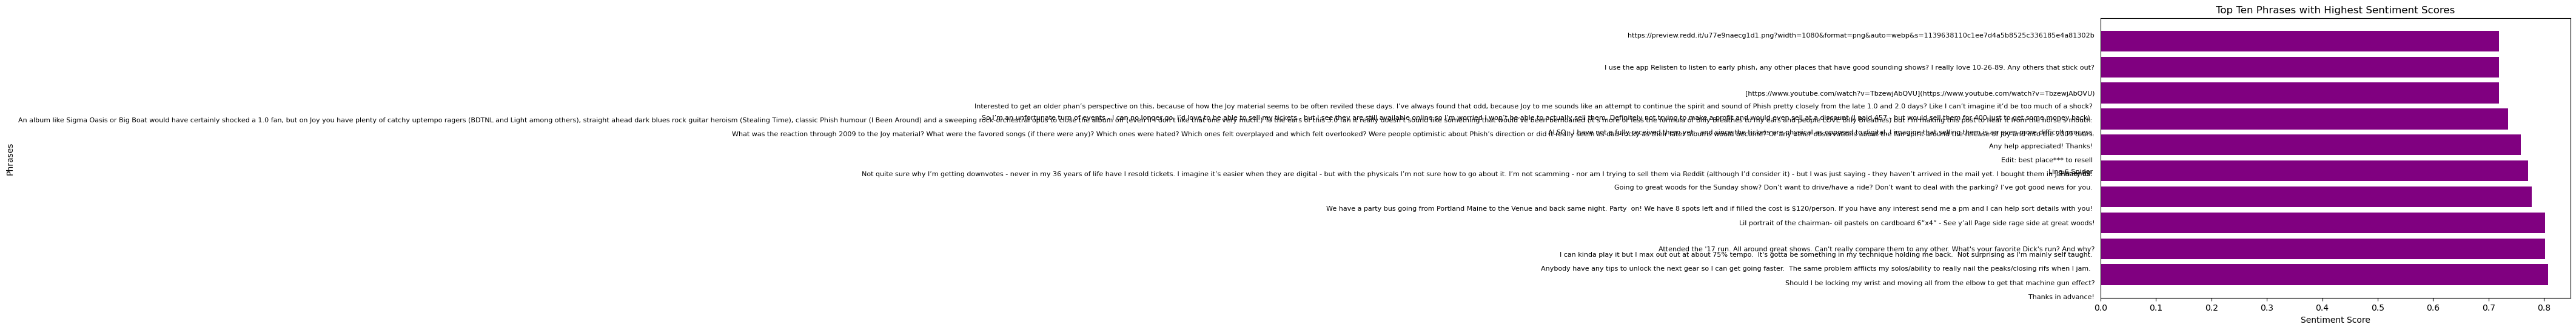

In [53]:
import matplotlib.pyplot as plt

# Increase the figure size  
plt.figure(figsize=(10, 6))

# Create a bar chart with a different color  
plt.barh(top_ten_phrases['body'], top_ten_phrases['sentiment_score'], color='purple')

# Customize the axes labels and title  
plt.xlabel('Sentiment Score')
plt.ylabel('Phrases')
plt.title('Top Ten Phrases with Highest Sentiment Scores')

# Wrap text in y-axis labels  
plt.yticks(fontsize=8)  # Adjust the font size for better visibility  
plt.gca().tick_params(axis='y', width=0)  # Remove tick lines

# Display the modified bar chart  
plt.tight_layout()  # Adjust the layout to prevent overlapping  
plt.show()

**Summary and Findings:** <br>

This code demonstrates the process of collecting and analyzing data from the "r/phish" subreddit using the PRAW library, performing data cleaning, and extracting sentiment from the text. Here's a breakdown of the steps:

1. Importing necessary libraries such as pandas, numpy, praw, matplotlib, seaborn, sklearn, and nltk.
2. Collecting data from the "r/phish" subreddit using PRAW, extracting post titles and bodies, and storing them in a pandas DataFrame.
3. Checking the information and displaying the DataFrame to examine the data structure and contents.
4. Dropping any null values from the DataFrame.
5. Importing NLTK's stopwords and punctuation to remove them from the text data.
6. Defining a function to remove stopwords and punctuation from the text and applying it to the DataFrame to create a new column with cleaned text.
7. Saving the modified DataFrame as a CSV file.
8. Importing the SentimentIntensityAnalyzer from NLTK for sentiment analysis. <br>

**References:** <br>

Matplotlib documentation: Matplotlib. (n.d.). Matplotlib documentation. Retrieved from https://matplotlib.org/stable/contents.html 

Pandas documentation: Pandas. (n.d.). Pandas documentation. Retrieved from https://pandas.pydata.org/docs/

Stack Overflow: Stack Overflow. (n.d.). Stack Overflow. Retrieved from https://stackoverflow.com/